# PDM - Assignment 1

- **Topic:** Model Predictive Control (MPC)
- **Assessment:** The assignment is graded (0-10).


- **Deadline:** 09-12-2024 23:59
- **Submitting: SUBMIT ONLY `assignment1.ipynb` TO BRIGHTSPACE**. 


## Instructions
**Installation:** Follow the instructions in `installation_instructions.md` to setup your Python environment, if you haven't already.

**Checking your solutions:** All questions/exercises in this notebook are followed by tests. Some are for you to check your solution, others are hidden for grading. To get any points, your answer/code needs to pass both sets of tests.

## Information
Please fill in your names and student numbers in the cell below.

In [4]:
STUDENT_1_NAME = "Wang, Zhuoyang"
STUDENT_1_STUDENT_NUMBER = "6376770"

STUDENT_2_NAME = ""
STUDENT_2_STUDENT_NUMBER = ""

## Objectives
In this assignment, we consider the control of a vehicle with linear dynamics. We will use Model Predictive Control (MPC) to drive the vehicle to a desired location. The assignment contains questions on [Theory](#theory) and hands-on [Implementation](#implementation) exercises, where we implement MPC with and without a terminal set and with collision avoidance.

The course materials cover the required material. For refreshers you can check:
- <a id="state_space" href="https://nl.mathworks.com/videos/introduction-to-state-space-equations-1547129824178.html">State Space Video</a>
- <a id="lqr" href="https://nl.mathworks.com/videos/state-space-part-4-what-is-lqr-control-1551955957637.html">LQR Video</a>

<a id="theory"></a>
# Theoretical Questions
The following multiple-choice questions are related to optimization theory in the context of MPC. Please enter your answer where requested and remove `raise NotImplementedError()` afterwards. Make sure that all cells where you added an answer run (shift + enter) without giving an error.

In the following, vectors and matrices are denoted in bold and $||\mathbf{x}||^2_{\mathbf{Q}} = \mathbf{x}^T\mathbf{Q}\mathbf{x}$.

## Question 1
Consider the following quadratic optimization problem

\begin{align}
    \min_{\mathbf{x}} \qquad & ||\mathbf{x}||^2_{\mathbf{Q}}\\
    \textrm{s.t.} \qquad & \mathbf{H}\mathbf{x} - h \leq 0\\
\end{align}

This problem minimizes the two-norm of the decision variable $\mathbf{x} \in \mathbb{R}^n$ subject to a weight matrix $\mathbf{Q} \in \mathbb{R}^{n \times n}$. The linear inequality $\mathbf{H}\mathbf{x} \leq h$ constrains $\mathbf{x}$ to lie within a subspace of its domain, with $\mathbf{H} \in \mathbb{R}^{1 \times n}, h\in\mathbb{R}$. We assume here that the inequality is active, such that the optimal solution of $\mathbf{x}$ is affected by the presence of the inequality constraint. 

Instead of the problem above we can solve the following problem,

\begin{align}
    \min_{\mathbf{x}, \epsilon} \qquad & ||\mathbf{x}||^2_{\mathbf{Q}} + ||\epsilon||^2_{W_{\epsilon}} \\
    \textrm{s.t.} \qquad & \mathbf{H}\mathbf{x} - h \leq \epsilon,\\
    \qquad & \epsilon \geq 0,
\end{align}

where $\epsilon \in \mathbb{R}$ does not relate to the original problem, but is added in the design of the optimization problem.

###  (0.5p) a. How does $\epsilon$ change the optimization problem?

**A.** $\epsilon$ defines a reference signal that $\mathbf{x}$ can follow.

**B.** $\epsilon$ enlarges the feasible region of the constraint $\mathbf{H}\mathbf{x}\leq h$.

**C.** $\epsilon$ reduces the feasible region of the constraint $\mathbf{H}\mathbf{x}\leq h$.

In [5]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
answer_1a = "B" # "A" "B" or "C"

# YOUR CODE HERE

In [6]:
# DO NOT REMOVE OR MODIFY THIS CELL
assert (answer_1a == "A" or answer_1a == "B" or answer_1a == "C"), "Please answer \"A\", \"B\" or \"C\""

### (0.5p) b. Given that all $||Q||_2 \approx 1$, how should one pick $W_{\epsilon}$ (the weight of $\epsilon$)?

**A.** $W_{\epsilon} \ll 1$

**B.** $W_{\epsilon} \approx 1$

**C.** $W_{\epsilon} \gg 1$

In [7]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
answer_1b = "C" # "A", "B" or "C"

# YOUR CODE HERE

In [8]:
# DO NOT REMOVE OR MODIFY THIS CELL
assert (answer_1b == "A" or answer_1b == "B" or answer_1b == "C"), "Please answer \"A\", \"B\" or \"C\""

### (0.5p) c. Out of the three constraints below, which is most suitable for applying the reformulation with $\epsilon$?

**A.** A safety constraint to avoid collisions with humans.

**B.** A comfort constraint for an autonomous vehicle trying to reduce accelerations.

**C.** A kinematic constraint on a robot manipulator.

In [9]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
answer_1c = "B" # "A", "B" or "C"

# YOUR CODE HERE

In [10]:
# DO NOT REMOVE OR MODIFY THIS CELL
assert (answer_1c == "A" or answer_1c == "B" or answer_1c == "C"), "Please answer \"A\", \"B\" or \"C\""

## (0.75p) Question 2. Choose LQR or MPC: 

a. ... has a finite horizon.

b. ... has an infinite number of variables.

c. ... accounts explicitly for constraints.

d. ... has an analytical solution to its optimization problem

<!-- Question on Horizon length (finite/infinite) and constraints/no constraints between LQR and MPC -->

In [11]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
a = "MPC" # "LQR" or "MPC"
b = "LQR" # "LQR" or "MPC"
c = "MPC" # "LQR" or "MPC"
d = "LQR" # "LQR" or "MPC"

# YOUR CODE HERE

In [12]:
# DO NOT REMOVE THIS CELL
assert (a == "LQR" or a == "MPC"), "Please answer \"LQR\" or \"MPC\" in a"
assert (b == "LQR" or b == "MPC"), "Please answer \"LQR\" or \"MPC\" in b"
assert (c == "LQR" or c == "MPC"), "Please answer \"LQR\" or \"MPC\" in c"
assert (d == "LQR" or d == "MPC"), "Please answer \"LQR\" or \"MPC\" in d"

## (0.75p) Question 3. Pick two advantages of having a terminal cost and a terminal set in MPC.

1. Recursive feasibility and stability guarantee.
2. Better approximation to the infinite horizon problem when using MPC.
3. Improved control performance (less deviation) when tracking a reference.
4. Reduced control inputs.


In [13]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
answer_1 = 1
answer_2 = 2

# YOUR CODE HERE

In [14]:
# DO NOT REMOVE THIS CELL
assert (answer_1 >= 1 and answer_1 <= 5), "Please give an answer 1-5"
assert (answer_2 >= 1 and answer_2 <= 5), "Please give an answer 1-5"
assert (answer_1 != answer_2), "You cannot give the same answer twice ;)"

<a id="implementation"></a>
# Implementation Exercise - Longitudinal Vehicle Control 
In the following exercise we implement some of the control techniques covered in the lectures. In particular MPC with and without a terminal set and considering collision avoidance. 

Consider a vehicle moving in 1D as visualized below, which we model by a linear 1D double integrator system, with position $p$ and velocity $v$ as states, acceleration $a$ as input and the position as output, i.e.,
\begin{equation}
    \mathbf{x} = \begin{bmatrix}
    p \\
    v 
    \end{bmatrix}\in \mathbb{R}^2, \qquad u = a \in \mathbb{R}, \qquad y = p \in \mathbb{R}.
\end{equation}

![Problem Schematic](resources/problem_schematic.png)

---

## State Space Dynamics
In order to control the vehicle, we need to first model its dynamical behavior. A typical way to formulate dynamics is to use a state space description in which we define the four matrices $\mathbf{A}_c, \mathbf{B}_c, \mathbf{C}_c, \mathbf{D}_c$, such that

\begin{equation}
    \dot{\mathbf{x}} = \mathbf{A}_c\mathbf{x} + \mathbf{B}_cu, \quad y = \mathbf{C}_c\mathbf{x} + \mathbf{D}_cu,
\end{equation}

*If you are not familiar with state-space dynamics, you can check <a id="state_space" href="https://nl.mathworks.com/videos/introduction-to-state-space-equations-1547129824178.html">this video</a>.*

---

## (1p) Exercise 1
In the following exercise we will implement the model on our 1D vehicle.

**Formulate the matrices $\mathbf{A}_c, \mathbf{B}_c, \mathbf{C}_c, \mathbf{D}_c$ that describe the dynamics of the 1D vehicle, then insert them in the variables `A_c`, `B_c`, `C_c` and `D_c` in the `vehicles_dynamics` class below. Run the code below where we apply a small throttle input to the vehicle. Does the vehicle behave as you would expect?**

Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

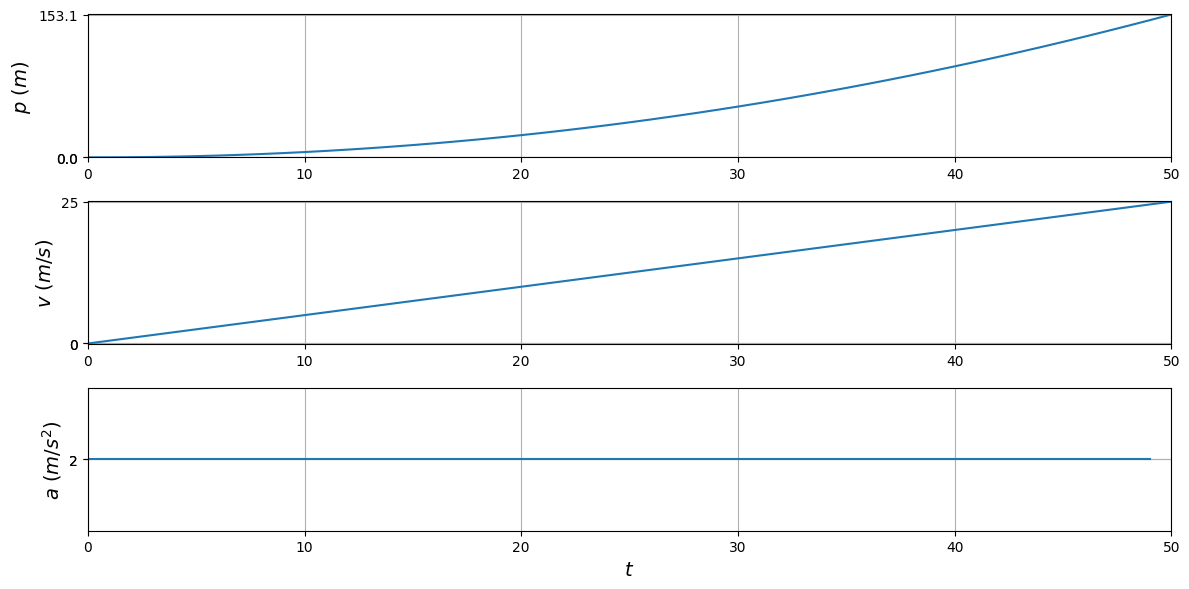

In [15]:
# Reloads the python files outside of this notebook automatically
%load_ext autoreload
%autoreload 2

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML # For animations in the notebook

# Import helper files
import visualization
import simulation
import animation

class vehicle_dynamics:

    def __init__(self, dt):
        
#         Exercise 1: Enter the correct state space matrices using these statements, replacing "0." where necessary
#         Uncomment the code below and remove the "NotImplementedError"

#         self.A_c = np.array([
#             [0., 0.],
#             [0., 0.]])

#         self.B_c = np.array([
#             [0.],
#             [0.]])

#         self.C_c = np.array([
#             [0., 0.]])

#         self.D_c = np.array([
#             [0.]])
        
        # YOUR CODE HERE
        self.A_c = np.array([
            [0., 1.],
            [0., 0.]])

        self.B_c = np.array([
            [0.],
            [1.]])

        self.C_c = np.array([
            [1., 0.]])

        self.D_c = np.array([
            [0.]])
        
        # Euler discretization
        self.A = np.eye(2) + self.A_c * dt
        self.B = self.B_c * dt
        self.C = self.C_c
        self.D = self.D_c

        # Limits on state and input
        self.x_min = np.array([-1., -10])
        self.x_max = np.array([100, 25])
        self.u_min = -4.0
        self.u_max = 4.0
        
        # Used later
        self.theta_min = 0
        self.theta_max = 0
        
    def next_x(self, x, u):
        return self.A.dot(x) + self.B.transpose().dot(u)

# Dummy control function to test the model
def dummy_control(vehicle, x_init, x_target):
    dummy_control = 2.
    return dummy_control, vehicle.next_x(x_init, dummy_control), x_init, None
    
        
# Problem parameters
dt = 0.25                                     # Sampling period
T = 50                                        # Steps to simulate
x_initial = np.array([0., 0.])                # Initial state
x_target =  np.array([150., 0.])              # Dummy for this exercise

# Get the vehicle dynamics
vehicle = vehicle_dynamics(dt)

# Simulate the result
controller = lambda x_init : dummy_control(vehicle, x_init, 500.)
states, inputs, plans, timesteps, _ = simulation.simulate(vehicle, dt, T, x_initial, x_target, 1, controller)

# Animate the result
anim = animation.make_animation(timesteps, states, plans, x_target)
HTML(anim.to_html5_video())

In [16]:
# DO NOT REMOVE OR MODIFY THIS CELL
# Below are some preliminary tests that your solution should pass!

assert vehicle.A.shape == (2, 2), "Vehicle A matrix has the wrong dimensions"
assert vehicle.B.shape == (2, 1), "Vehicle B matrix has the wrong dimensions"
assert vehicle.C.shape == (1, 2), "Vehicle C matrix has the wrong dimensions"
assert vehicle.D.shape == (1, 1), "Vehicle D matrix has the wrong dimensions"

assert len(states[0, :]) == 51, "Number of computed states is incorrect"

assert abs(states[0, 20] - 23.75) < 0.1, "Your model is incorrect"


<!-- Possibly ask about the equilibria of the system -->
In the above animation the vehicle should be driving off the figure. The goal of our exercise however, is to make the vehicle stop in a predefined target location. To that end we will consider two Model Predictive Control (MPC) approaches. Before we think about controlling the vehicle, we will first analyze the behavior of our system. In particular, we will derive the *equilibria* of the system, i.e., states where without input the state does not change. Formally we are looking for $\mathbf{x} \in \mathbb{X}$, such that.
\begin{equation}
   \dot{\mathbf{x}} = \mathbf{A}_c\mathbf{x} + \mathbf{B}_cu = \mathbf{0}
\end{equation}


## (1p) Question 4. Solve the equilbria of the system. Which plot below depicts the equilibria correctly?

<table><tr><td><center><h3>A</h3></center></td><td><center><h3>B</h3></center></td></tr><tr>
    <td> <img src="./equilibria-a.png" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="./equilibria-b.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>
<tr><tr><td><center><h3>C</h3></center></td><td><center><h3>D</h3></center></td></tr>
    <td> <img src="./equilibria-c.png" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="./equilibria-d.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>
</table>
<!-- 
|![equilibria-a.png](equilibria-a.png) |![equilibria-b.png](equilibria-b.png)
|-|-|
|![equilibria-c.png](equilibria-c.png) |![equilibria-d.png](equilibria-d.png)| -->




In [17]:
# YOUR ANSWER HERE (Please ignore the "your code here" message below)
answer_4 = "A"

# YOUR CODE HERE

In [18]:
# DO NOT REMOVE OR MODIFY THIS CELL
assert (answer_4 == "A" or answer_4 == "B" or answer_4 == "C" or answer_4 == "D"), "Please answer \"A\", \"B\", \"C\" or \"D\""

Next, we use MPC to control our system.

---
## Model Predictive Control (MPC)
Please refer to the lecture for more details on MPC.

The idea behind MPC is to use a model of the system that we want to control (e.g., the model E2.1) to predict the state of the system over a finite horizon into the future using our actions. Then, optimizing the outcomes for these actions, we obtain a vector of optimal actions $\mathbf{u}_{0:N-1}$ (The notation $\mathbf{u}_{0:N-1}$ is shorthand for $\begin{bmatrix} u_0 & u_1 & ... & u_{N-1} \end{bmatrix}^T$). Typically this approach is applied in a receding horizon framework where after computing the vector of optimal inputs $\mathbf{u}_{0:N-1}$ we apply the first input $u_0$ and we repeat the MPC problem in the next time step.

---

The goal of the exercise is to drive the vehicle to a desired position by controlling its acceleration. We have the following physical constraints on the input and output of our system.
\begin{equation}
    -1\textrm{m} \leq p \leq 100 \textrm{m}, \quad -10\textrm{m/s} \leq v \leq 25 \textrm{m/s}, \quad -4\textrm{m/}s^2 \leq a \leq 4 \textrm{m/}s^2.\\
\end{equation}

In practice, it is not possible to send a continuous input signal to our vehicle, because of computation times and delays. Instead control inputs are applied in discrete intervals where they remain constant until the next input is received. This requires us to reformulate the dynamics in *discrete-time*. In this setting we denote $\mathbf{x}(t=kh)$ as $\mathbf{x}_k$, with $h$ the duration of each discrete interval. The `vehicle_dynamics` class above already computes the matrices $\mathbf{A}, \mathbf{B}$ such that

\begin{equation}
    \mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}u_k, \quad y_k = \mathbf{C}\mathbf{x}_k + \mathbf{D}u_k
\end{equation}



# Exercise 2: MPC without terminal set (Formulation)
In the following exercise, we will implement an MPC for the 1-D tracking problem. You can use the cell below to formulate the problem (optional). The problem should have the following properties:
- The inputs $u_k$ are penalized over the horizon,
- The cost is minimized if for all $k$, $p_k = p_{\textrm{ref}}$, with $p_{\textrm{ref}}$ a constant position reference.
- The velocity is **NOT** penalized
- The optimized variables (decision variables) are the inputs $\mathbf{u}_{0:N-1}$.
- The input and tracking cost terms are multiplied by the weights $W_u = 0.2$ and $W_x = 1$.

Additionally, the initial state for the problem is given by the constant $\mathbf{x}_{\textrm{init}}$.

You can use the latex code below to formulate the problem (optional).
\begin{align}
    \min_{\mathbf{u}_{0:N-1}} \qquad & ... \\
    \textrm{s.t.} \qquad & \mathbf{x}_0 = \ ...\\
    \qquad & \mathbf{x}_{k+1} = \ ...\\
    \qquad & \mathbf{x}_k \geq \ ...\\
    \qquad & \mathbf{x}_k \leq \ ...\\
    \qquad & u_k \geq \ ...\\
    \qquad & u_k \leq \ ...\\
\end{align}

*Note that you can use Latex syntax in the cell below.*

YOUR ANSWER HERE

\begin{align}
    \min_{\mathbf{u}_{0:N-1}} \qquad & \sum_{k=0}^{N-1} W_x (p_k - p_{\textrm{ref}})^2 + W_u u_k^2 \\
    \textrm{s.t.} \qquad & \mathbf{x}_0 = \mathbf{x}_{\textrm{init}} \\
    \qquad & \mathbf{x}_{k+1} = \mathbf{A} \mathbf{x}_k + \mathbf{B} u_k, \quad \forall k = 0, 1, \dots, N-1 \\
    \qquad & \mathbf{x}_k \geq \begin{bmatrix} -1 \\ -10 \end{bmatrix}, \quad \forall k = 0, 1, \dots, N-1 \\
    \qquad & \mathbf{x}_k \leq \begin{bmatrix} 100 \\ 25 \end{bmatrix}, \quad \forall k = 0, 1, \dots, N-1 \\
    \qquad & u_k \geq -4 \\
    \qquad & u_k \leq 4 \\
\end{align}


# (2.5p) Exercise 2. MPC without terminal set (Implementation)
The next step is to implement the MPC problem that you formulated, on the vehicle. The function `mpc_control(vehicle, x0)` provides a framework for implementing and solving your MPC problem. We will make use of `cvxpy` to solve the optimization (see https://www.cvxpy.org/). Some coding hints are provided below. See https://www.cvxpy.org/tutorial/intro/index.html#constraints for more information on expressing the constraints. The code uses the input computed by `mpc_control` to simulate the vehicle forward using the vehicle dynamics of the previous exercise.

**Implement the MPC as described in the (Formulation) part of this exercise, in the function `mpc_control` below and run the codeblock to visualize the resulting trajectories.**

*Hint: Please consider carefully in what time steps k the states/inputs should be penalized.*

Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

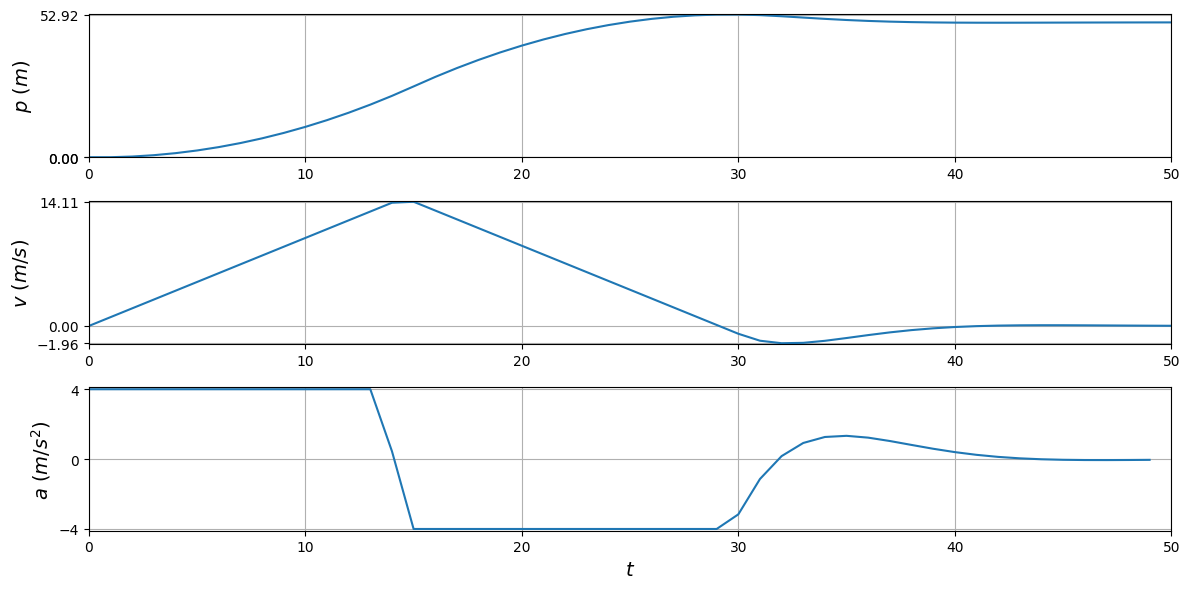

In [19]:
# Import libraries
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML # For animations in the notebook

# Import helper files
import visualization
import simulation
import animation


def mpc_control(vehicle, N, x_init, x_target):

    # DO NOT CHANGE THESE PARAMETERS #
    weight_input = 0.2*np.eye(1)    # Weight on the input
    weight_tracking = 1.0*np.eye(1) # Weight on the tracking state

    cost = 0.
    constraints = []
    
    # Create the optimization variables
    x = cp.Variable((2, N + 1)) # cp.Variable((dim_1, dim_2))
    u = cp.Variable((1, N))
    
    # HINTS: 
    # -----------------------------
    # - To add a constraint use
    #   constraints += [<constraint>] 
    #   i.e., to specify x <= 0, we would use 'constraints += [x <= 0]'
    # - To add to the cost, you can simply use
    #   'cost += <value>'
    # - Use @ to multiply matrices and vectors (i.e., 'A@x' if A is a matrix and x is a vector)
    # - A useful function to know is cp.quad_form(x, M) which implements x^T M x (do not use it for scalar x!)
    # - Use x[:, k] to retrieve x_k
  
    # For each stage in k = 0, ..., N-1
    for k in range(N):
        
        # EXERCISE: Implement the cost components and/or constraints that need to be satisfied for each step, here    
        # YOUR CODE HERE
        cost += weight_tracking * (x[0, k] - x_target[0]) ** 2
        cost += weight_input @ u[:, k] ** 2
        
        if k < N - 1:
            constraints += [x[:, k + 1] == vehicle.A @ x[:, k] + vehicle.B @ u[:, k]]
            constraints += [x[0, k] >= -1, x[0, k] <= 100]
            constraints += [x[1, k] >= -10, x[1, k] <= 25]
            constraints += [u[:, k] >= -4, u[:, k] <= 4]

    # EXERCISE: Implement the cost components and/or constraints that need to be added once, here
    # YOUR CODE HERE
    constraints += [x[:, 0] == x_init]
    
    # Solves the problem
    problem = cp.Problem(cp.Minimize(cost), constraints)
    problem.solve(solver=cp.OSQP)

    # We return the MPC input and the next state (and also the plan for visualization)
    return u[:, 0].value, x[:, 1].value, x[:, :].value, None


# Problem parameters
dt = 0.25                           # Sampling period
N = 20                              # MPC Horizon
T = 50                              # Duration of simulation
x_init = np.array([0., 0.])         # Initial conditions
x_target =  np.array([50., 0.])     # State to reach
    
# Get the vehicle dynamics
vehicle = vehicle_dynamics(dt)

# Simulate the result
controller = lambda x_init : mpc_control(vehicle, N, x_init, x_target)
states, inputs, plans, timesteps, _ = simulation.simulate(vehicle, dt, T, x_init, x_target, N, controller)

# Save the result for later
no_terminal_states = states
no_terminal_inputs = inputs

# Animate the result
anim = animation.make_animation(timesteps, states, plans, x_target)
HTML(anim.to_html5_video())

In [20]:
# DO NOT REMOVE OR MODIFY THIS CELL
# Below are some preliminary tests that your solution should pass!

assert abs(mpc_control(vehicle, N, x_target, x_target)[0]) <= 1e-8, "Your controller should output zero when we are at the target state"
assert mpc_control(vehicle, N, x_init, x_target)[0] > 0., "Your controller should drive forward initially"


## (1p) Exercise 3. MPC with a static obstacle
In the following exercise we consider the case where a car is parked on our road before the target position. We will expand our basic MPC (From Ex. 2) with a collision avoidance constraint. 

Collision avoidance constraints are usually problematic because when we plan in a 2-D workspace, obstacles divide the workspace where we are optimizing in (e.g., we could pass any obstacle on the left or the right), making the optimization *nonconvex*.
<!-- That is, there may be multiple local optima and our optimization will only find one, which can result in bad performance or situations in which the vehicle cannot proceed (deadlocks). -->
In this 1-D exercise, we can formulate *convex* collision avoidance constraints. We assume that the other vehicle has the same dimensions as our vehicle and we have computed collision discs for both vehicles parameterized by the radius `disc_radius` and the vector of offsets from the center of the vehicle `disc_offset` (see figure).

![Collision Disc Collision Model](resources/disc_model.png)

**Formulate a constraint of the form $\mathbf{A}_{cc}\mathbf{x} <= \mathbf{b}_{cc}$ such that our vehicle stops before the parked car (i.e., it should not collide). Then, copy your implementation from Ex. 2 and add the collision avoidance constraint. Check if your vehicle evades collisions by running the code.**

Disc offsets (from the vehicle center): [-1.125  1.125] m
Disc Radius: 1.505199322349037 m


Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

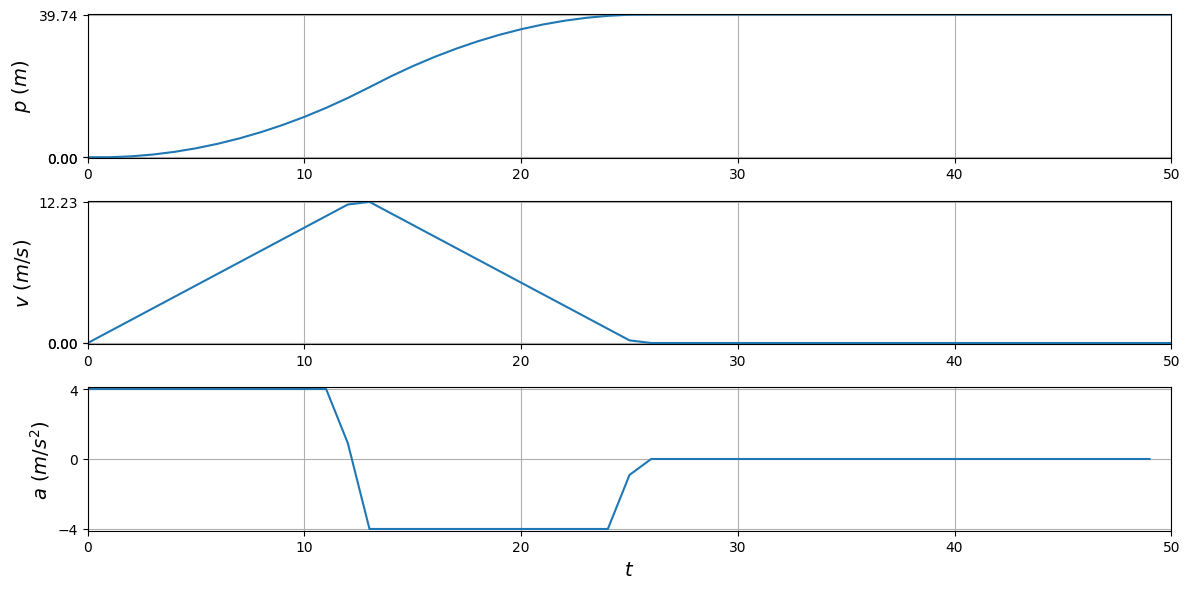

Computation time of solver: mean:  0.038  sec., std:  0.016  sec.


In [21]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import control_matrices
import math
import time

terminal_set = control_matrices.TerminalSet()
lqr_controller = control_matrices.LQRController()

def mpc_control_invariant(vehicle, N, x_init, x_target, A_cc, b_cc, solver_type=cp.OSQP, solver_options={}):

    # DO NOT CHANGE THESE PARAMETERS #
    weight_input = 0.2*np.eye(1)    # Weight on the input
    weight_tracking = 1.0*np.eye(1) # Weight on the tracking state

    cost = 0.
    constraints = []
    
    # Create the optimization variables
    x = cp.Variable((2, N + 1)) # cp.Variable((dim_1, dim_2))
    u = cp.Variable((1, N))
    
    # HINTS: 
    # -----------------------------
    # - To add a constraint use
    #   constraints += [<constraint>] 
    #   i.e., to specify x <= 0, we would use 'constraints += [x <= 0]'
    # - To add to the cost, you can simply use
    #   'cost += <value>'
    # - Use @ to multiply matrices and vectors (i.e., 'A@x' if A is a matrix and x is a vector)
    # - A useful function to know is cp.quad_form(x, M) which implements x^T M x (do not use it for scalar x!)
    # - Use x[:, k] to retrieve x_k
  
    # For each stage in k = 0, ..., N-1
    for k in range(N):

        # TODO: Copy your solution of Ex. 2 here and add the linear collision avoidance constraint
        # Note that A_cc and b_cc are available here
        # YOUR CODE HERE
        cost += weight_tracking * (x[0, k] - x_target[0]) ** 2
        cost += weight_input @ u[:, k] ** 2
        
        if k < N - 1:
            constraints += [x[:, k + 1] == vehicle.A @ x[:, k] + vehicle.B @ u[:, k]]
            constraints += [x[0, k] >= -1, x[0, k] <= 100]
            constraints += [x[1, k] >= -10, x[1, k] <= 25]
            constraints += [u[:, k] >= -4, u[:, k] <= 4]
        
        constraints += [A_cc @ x[:, k] <= b_cc]
    
    # TODO: Copy your solution of Ex. 2 here   
    # YOUR CODE HERE
    constraints += [x[:, 0] == x_init]

    # Solves the problem
    problem = cp.Problem(cp.Minimize(cost), constraints)
    time0 = time.perf_counter()
    problem.solve(solver=solver_type, **solver_options)
    computation_time = time.perf_counter() - time0
    
    # We return the MPC input and the next state
    return u[:, 0].value, x[:, 1].value, x.value, 0, computation_time

computation_times = []

def controller_wrapper(vehicle, N, x_init, x_target, A_cc, b_cc, solver_type=cp.OSQP, solver_options={}):
    result_mpc = mpc_control_invariant(vehicle, N, x_init, x_target, A_cc, b_cc, solver_type, solver_options)
    computation_times.append(result_mpc[4])
    return result_mpc[:4]
    
# Problem parameters
dt = 0.25                           # Sampling period
N = 20                              # MPC Horizon
T = 50                              # Duration of simulation
x_initial = np.array([0., 0.])      # Initial conditions
x_target =  np.array([50., 0.])     # State to reach

# Compute the linear constraint for the other vehicle
x_other_vehicle = np.zeros((2, 1))
x_other_vehicle[0, 0] = x_target[0]-5.

# Collision constraint data (same for both vehicles)
n_discs = 2            # The number of collision disc that model the vehicle region
vehicle_length = 4.5   
vehicle_width = 2.0

# Let's position the discs equally spaced
# Then define the offset
disc_offset = np.zeros(n_discs)
for disc in range(n_discs):
    disc_offset[disc] = -vehicle_length/2. + (vehicle_length)/(n_discs*2.) + vehicle_length/n_discs*disc
    
                   
disc_radius = math.sqrt((vehicle_length / n_discs / 2.)**2 + (vehicle_width / 2.) ** 2)
print('Disc offsets (from the vehicle center): {} m\nDisc Radius: {} m'.format(disc_offset, disc_radius))

# Exercise 3: Computing the linear collision avoidance constraint
# Your code should set A_cc and b_cc which are passed to the solver 
# (you can uncomment the lines below and remove the "NotImplementedError")
# A_cc = 
# b_cc = 
# YOUR CODE HERE
A_cc = np.array([
    [1., 0.]
])
b_cc = np.array([
    x_other_vehicle[0, 0] + disc_offset[0] - disc_radius - disc_offset[1] - disc_radius
])

# Get the vehicle dynamics
vehicle = vehicle_dynamics(dt)

controller = lambda x_init: controller_wrapper(vehicle, N, x_init, x_target, A_cc, b_cc)
states, inputs, plans, timesteps, _ = simulation.simulate(vehicle, dt, T, x_initial, x_target, N, controller)
print("Computation time of solver: mean: ", np.round(np.mean(computation_times), 3), " sec., std: ", 
      np.round(np.std(computation_times), 3), " sec.")

# Animate the result
anim = animation.make_animation(timesteps, states, plans, x_target, 0, True, x_other_vehicle, disc_radius, disc_offset)
HTML(anim.to_html5_video())

In [22]:
# DO NOT REMOVE OR MODIFY THIS CELL

## (1p) Exercise 4 MPC solvers
The computation time of an MPC algorithm depends on the chosen solver. In the exercise above, the **OSQP** solver was used with:  
```python
problem.solve(solver=cp.OSQP)
```
Depending on the problem complexity, available computation time, and desired accuracy or robustness, other solvers may offer different performance.
A list of available solvers can be found in the [CVXPY documentation](https://www.cvxpy.org/tutorial/solvers/index.html).

**Check out the available solvers in this toolbox and explore their applicability to different types of optimization problems. Write a short summary of your findings.**  
Experiment by changing the solver type and tuning solver options (e.g., maximum iterations, tolerances), and observe their effect on performance and computation time.  
Keep in mind that your analysis applies only to this specific MPC problem and may not generalize to other MPC formulations.

**Additional information [OPTIONAL]:**  
Besides CVXPY, several other MPC toolboxes and solvers are available that are optimized for real-time and large-scale control applications:
- *[Acados](https://docs.acados.org/):*  An open-source framework for fast nonlinear optimization, tailored for real-time applications such as nonlinear MPC. It provides efficient interfaces to Python, MATLAB, and C, and supports code generation for embedded deployment.
- *[FORCESPRO](https://forces.embotech.com):*  A commercial, high-performance optimization solver designed specifically for embedded MPC. It automatically generates tailored solver code for real-time applications with strict timing and memory constraints.
- *[CasADi](https://web.casadi.org/docs/):*  A symbolic framework for automatic differentiation and nonlinear optimization. It is widely used for modeling, simulation, and control, often serving as a backend for tools like Acados or IPOPT.
- *[qpOASES](https://github.com/coin-or/qpOASES):* An open-source quadratic programming solver based on an online active-set strategy, well-suited for MPC problems that require solving a sequence of similar QPs efficiently.

Available solvers:  ['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']


Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

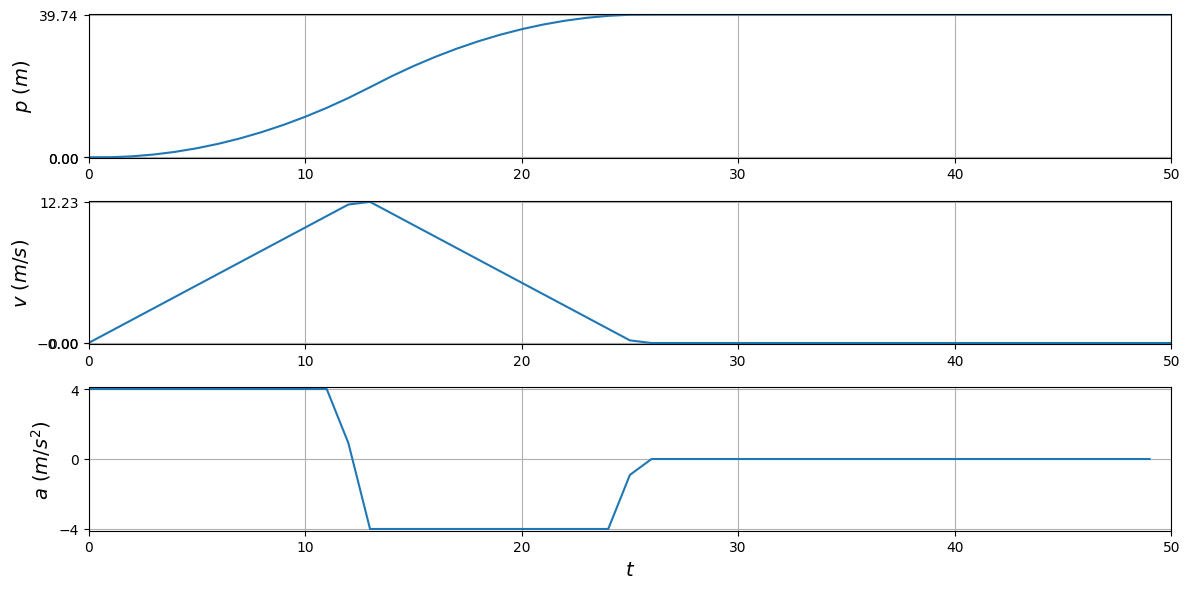

Computation time of solver: mean:  0.049  sec., std:  0.023  sec.


In [23]:
print("Available solvers: ", cp.installed_solvers())
solver_type = cp.CLARABEL; solver_options = { "max_iter": 10000, "time_limit": 100.0, "verbose": False }
# solver_type = cp.ECOS; solver_options = { "max_iters": 10000, "abstol": 1e-8, "reltol": 1e-8, "feastol": 1e-8, "abstol_inacc": 5e-5, "reltol_inacc": 5e-5, "feastol_inacc": 1e-4, "verbose": False }
# solver_type = cp.ECOS_BB; solver_options = { "max_iters": 10000, "abstol": 1e-8, "reltol": 1e-8, "feastol": 1e-8, "abstol_inacc": 5e-5, "reltol_inacc": 5e-5, "feastol_inacc": 1e-4, "verbose": False }
# solver_type = cp.OSQP; solver_options = { "max_iter": 10000, "eps_abs": 1e-5, "eps_rel": 1e-5, "verbose": False }
# solver_type = cp.SCIPY; solver_options = { "verbose": False }
# solver_type = cp.SCS; solver_options = { "max_iters": 10000, "eps": 1e-4, "alpha": 1.8, "acceleration_lookback": 10, "scale": 5.0, "normalize": True, "use_indirect": False, "use_quad_obj": True, "verbose": False }

controller = lambda x_init: controller_wrapper(vehicle, N, x_init, x_target, A_cc, b_cc, solver_type, solver_options)
states, inputs, plans, timesteps, _ = simulation.simulate(vehicle, dt, T, x_initial, x_target, N, controller)
print("Computation time of solver: mean: ", np.round(np.mean(computation_times), 3), " sec., std: ", 
      np.round(np.std(computation_times), 3), " sec.")

Document your findings here:

<!-- CLARABEL:
    Default (max_iter = 10000): Computation time of solver: mean:  0.066  sec., std:  0.035  sec.
    max_iter = 100: Computation time of solver: mean:  0.066  sec., std:  0.035  sec.
    max_iter = 10: Computation time of solver: mean:  0.066  sec., std:  0.034  sec.
    less: fast but inaccurate results.
ECOS:
    Default (*tol = 1e-8): Computation time of solver: mean:  0.067  sec., std:  0.035  sec.
    *tol = 1e-5: Computation time of solver: mean:  0.067  sec., std:  0.035  sec.
    *tol = 1e-2: divergent results.
ECOS_BB:
    Default (*tol = 1e-8): Computation time of solver: mean:  0.066  sec., std:  0.034  sec.
    *tol = 1e-5: Computation time of solver: mean:  0.068  sec., std:  0.036  sec.
    *tol = 1e-2: divergent results.
OSQP:
    Default (*tol = 1e-5): Computation time of solver: mean:  0.068  sec., std:  0.037  sec.
    *tol = 1e-3: Computation time of solver: mean:  0.067  sec., std:  0.037  sec. (but inaccurate results)
SCIPY: do not support the cones
SCS:
    Default (max_iter = 10000): Computation time of solver: mean:  0.067  sec., std:  0.037  sec.
    max_iters = 100: Computation time of solver: mean:  0.067  sec., std:  0.037  sec. (not very accurate results) -->

Solver comparison for the MPC example (tuning some of the parameters):

| Solver    | Settings                         | Mean (s) | Std (s) | Notes                                 |
|-----------|----------------------------------|----------|---------|---------------------------------------|
| CLARABEL  | Default (max_iter = 10000)       | 0.066    | 0.035   | Accurate                              |
| CLARABEL  | max_iter = 100                   | 0.066    | 0.035   | Similar speed/accuracy                |
| CLARABEL  | max_iter = 10                    | 0.066    | 0.034   | Fast but inaccurate                   |
| ECOS      | Default (tol = 1e-8)             | 0.067    | 0.035   | Accurate                              |
| ECOS      | tol = 1e-5                       | 0.067    | 0.035   | Similar accuracy                      |
| ECOS      | tol = 1e-2                       | -        | -       | Divergent                             |
| ECOS_BB   | Default (tol = 1e-8)             | 0.066    | 0.034   | Accurate                              |
| ECOS_BB   | tol = 1e-5                       | 0.068    | 0.036   | Similar accuracy                      |
| ECOS_BB   | tol = 1e-2                       | -        | -       | Divergent                             |
| OSQP      | Default (tol = 1e-5)             | 0.068    | 0.037   | Accurate                              |
| OSQP      | tol = 1e-3                       | 0.067    | 0.037   | Inaccurate results                    |
| SCIPY     | -                                | -        | -       | Does not support SOC cones            |
| SCS       | Default (max_iters = 10000)      | 0.067    | 0.037   | Accurate                              |
| SCS       | max_iters = 100                  | 0.067    | 0.037   | Inaccurate results                    |

The MPC problem in this assignment contains a QP with linear constraints, all conic solvers (CLARABEL, ECOS, ECOS_BB, OSQP, SCS) show almost identical computation times (approx. 0.066 ~ 0.068 s). The problem size is too small to produce visible solver speed differences.

By tunning the parameters we can find that:
- Loosening tolerances (`tol`, `eps`) or reducing iteration limits (`max_iter`) leads to (theoretical) faster but inaccurate MPC behavior.
- Too loose tolerances (e.g., `1e-2`) may cause divergence.
- Tight tolerances will not slow down the solver too much for this small-scale MPC.
- The results may become inaccurate when `max_iters` is too small.

According to the document, for this MPC problem OSQP and CLARABEL are the most appropriate solvers. SCS and ECOS also work but offer no speed advantage due to the small problem size. SCIPY cannot work (it uses linprog as shown in the document). And for parameters, tolerances mainly affect accuracy rather than speed.

---

<!-- Full horizon versus MPC -> terminal set --> 
One of the problems with MPC you may have noticed is that by using a finite horizon, our optimized actions may be optimal within the horizon, but are possibly suboptimal over the full duration of the task. For example, in our problem, once the goal enters the horizon of the MPC, the vehicle may not be able to brake hard enough to stop in time.

The goal of the following exercise is to resolve this issue by constructing a *terminal set*, that is, a set in which the terminal state of the MPC is constrained, such that we *know* that there exists a stabilizing controller that satisfies the input and state constraints after our limited MPC horizon.

<!-- LQR? -->

---

## Terminal Set for Tracking [ADVANCED][OPTIONAL]
We will now consider, in more detail how to construct a terminal set for tracking. A summary of the method that we will use (see [[1]](#1)) is provided below.

Firstly, since our target position can be far away, it will be hard to define a set in which our terminal state should be (imagine, for example, tracking a position 20km away on the highway with our terminal state 100m away). Hence, we will find an *intermediate state* $z_s = (\mathbf{x}_s, u_s)$ around which we find a terminal set for the current MPC problem, then by moving this intermediate state to the target state $\hat{\mathbf{x}}_s$, we will reach our goal safely.

To define this intermediate state, we first parameterize the equilibria of the system and the associated output using a parameter $\theta$ and matrices $\mathbf{M}_{\theta}, \mathbf{N}_{\theta}$ as

\begin{align}
\mathbf{z}_s = \mathbf{M}_{\theta}\theta \\
y_t = \mathbf{N}_{\theta}\theta.
\end{align}

Next, we compute the LQR control matrix $K$ such that the input $u = \mathbf{K}\mathbf{x}$ ensures that the state of the closed-loop system (i.e., the system with the controller) converges to zero (see the lecture slides on LQR). Then to control towards an equilibrium $(\mathbf{x}_s, u_s)$, we can apply

\begin{equation}
u = \mathbf{K}(\mathbf{x} - \mathbf{x}_s) + u_s.
\end{equation}

Substituting this input into our discrete-time dynamics, gives

\begin{align}
\mathbf{x}_{k+1} &= \mathbf{A}\mathbf{x} + \mathbf{B}(\mathbf{K}(\mathbf{x}_k - \mathbf{x}_s) + u_s).\\
&= (\mathbf{A} + \mathbf{B}\mathbf{K})\mathbf{x}_k + B\begin{bmatrix}-K & I_m\end{bmatrix}\begin{bmatrix}x_s\\u_s\end{bmatrix}\\
&= (\mathbf{A} + \mathbf{B}\mathbf{K})\mathbf{x}_k + B\begin{bmatrix}-K & I_m\end{bmatrix}\mathbf{M}_{\theta}\theta
\end{align}

Where in the last step we substitute the parameterization of the equilibria, introducing $\theta$ as an extra state. Let the extended state, including $\theta$, be denoted by $\mathbf{w} = \begin{bmatrix}\mathbf{x}^T & \theta\end{bmatrix}^T$. Then with $L = \begin{bmatrix}-K & I_m\end{bmatrix}\mathbf{M}_{\theta}$ we can write how the extended state with the controller evolves:

\begin{equation}
\mathbf{w}_{k+1} = \begin{bmatrix}A + BK & BL \\ 0 & 1\end{bmatrix}\mathbf{w}_k = \mathbf{A}_w\mathbf{w}_k.
\end{equation}

Now the extended states that are acceptable for our purposes need to satisfy the state constraints $(\mathbf{x} \in \mathbb{X})$ and input constraints $(u \in \mathbb{U})$, i.e., $\mathbf{w}$ needs to belong to a set

\begin{equation}
W = \{\mathbf{w} = (\mathbf{x}, \theta) \ : \ (\mathbf{x}, \mathbf{K}\mathbf{x} + \mathbf{L}\theta) \in \mathbb{X}\times\mathbb{U}, \mathbf{M}_{\theta}\theta \in \mathbb{X}\times\mathbb{U}\}
\end{equation}

Using the dynamics of $\mathbf{w}$, we can define an *invariant set*, that is, a set $\Omega$ such that if $\mathbf{w}\in \Omega$, then $\mathbf{A}_w \mathbf{w} \in \Omega$ and $\Omega \subseteq W$. In order for the state to stay in the set, we define the terminal set as

\begin{equation}
\mathcal{X}_N^w = \{\mathbf{w} \ : \ \mathbf{A}_w^i \mathbf{w} \in W, \ \forall i \geq 0 \}
\end{equation}

Hence if $\mathbf{w}$ enters our invariant set then our controller can keep it there, while satisfying the constraints. This implies that a stabilizing controller exists (the LQR controller) and that our MPC can always find a solution inside the invariant set.

---

<a id="mpc_with"></a> 
## MPC with a Terminal Set [ADVANCED][OPTIONAL]
In [[1]](!path_ref) the following MPC problem with the terminal set for tracking is proposed:

\begin{align}
    \min_{\mathbf{u}_{0:N-1}, \mathbf{x}_{1:N}, \theta} \qquad &\sum_{k = 0}^{N-1} ||\mathbf{x}_k - \mathbf{x}_s||^2_Q + ||u_k - u_s||^2_R + \\
    &||\mathbf{x}_N - \mathbf{x}_s||^2_P + ||\mathbf{x}_s - \hat{\mathbf{x}}_s||^2_T\\
    \textrm{s.t.}     \qquad & \textrm{Constraints from Ex. 2}\\
    \qquad & (\mathbf{x}_s, \mathbf{u}_s) = \mathbf{M}_{\theta}\theta,\\
    \qquad & (\mathbf{x}_N, \theta) \in \mathcal{X}_N^w,
\end{align}
where $||\mathbf{x}||^2_{\mathbf{M}}$ is shorthand for $\mathbf{x}^T\mathbf{M}\mathbf{x}$ and $\mathbf{Q}, \mathbf{R}$ are the state and input weights. 

## (1.5p) Exercise 5. MPC with a Terminal Set [ADVANCED][OPTIONAL]
Next, we will extend the MPC with a terminal set for tracking. We have used the mpt3 toolbox in Matlab to generate the terminal set $\mathcal{X}_T^w$, which are given by multiple linear equations, each of the form $\mathbf{A}_i\mathbf{w}\leq \mathbf{b}_i$. Available in the following code block are:
- LQR Weights $\mathbf{Q}$, $\mathbf{R}$ (`lqr_controller.Q`, `lqr_controller.R`)
- The control matrix $\mathbf{K}$ and the $\mathbf{P}$ matrix (`lqr_controller.K`, `lqr_controller.P`)

For the terminal set we provide
- The terminal set, consisting of several linear constraints of the form $\mathbf{A}_i\mathbf{w} \leq \mathbf{b}_i$ (`terminal_set.A_invariant`, `terminal_set.b_invariant`)
- Selection matrices $\mathbf{M}_{\theta}$, $\mathbf{N}_{\theta}$ (`terminal_set.M_t`, `terminal_set.N_t`)
- A positive definite matrix $T$ (`terminal_set.T`)

The target state $\hat{\mathbf{x}}_s$ is provided by `x_target`

**Implement the [MPC with a Terminal Set](#mpc_with) in `mpc_control_invariant(vehicle, x_init, x_target)` using the provided terminal set and LQR weights. Then run the code.**

Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

Problem has 43 equality constraints (HINT: the correct solution has 45)
Problem has 132 inequality constraints (HINT: the correct solution has 140)


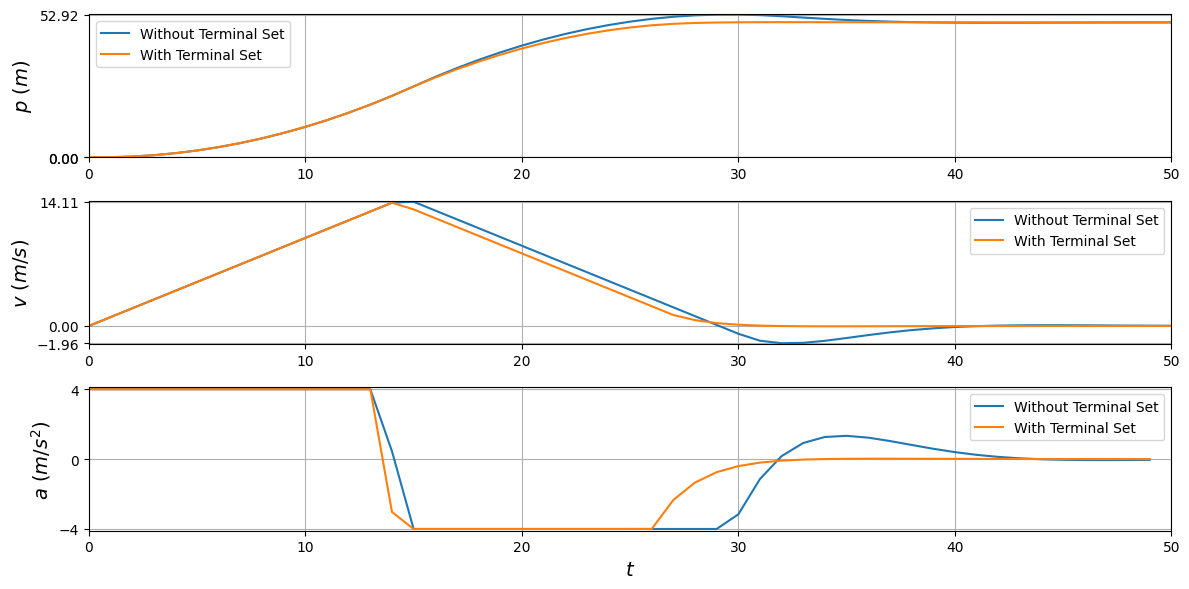

In [24]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import control_matrices

terminal_set = control_matrices.TerminalSet()
lqr_controller = control_matrices.LQRController()

printed_warning = False

def mpc_control_invariant(vehicle, N, x_init, x_target):
    global printed_warning
    
    # Defines the problem variables, note that we now also have xs, us and theta!
    x = cp.Variable((2, N + 1))
    u = cp.Variable((1, N))
    xs = cp.Variable(2)
    us = cp.Variable(1)
    theta = cp.Variable(1)

    cost = 0.
    constraints = []
    
    # HINTS: 
    # -----------------------------
    # - To add a constraint use
    #   constraints += [<constraint>] 
    #   i.e., to specify x <= 0, we would use 'constraints += [x <= 0]'
    # - To add to the cost, you can simply use
    #   'cost += <value>'
    # - Use @ to multiply matrices and vectors (i.e., 'A@x' if A is a matrix and x is a vector)
    # - A useful function to know is cp.quad_form(x, M) which implements x^T M x (do not use it for scalar x!)
    # - Use x[:, k] to retrieve x_k
  
    # For each stage in k = 0, ..., N-1
    for k in range(N):
        
        # EXERCISE 2.4: Implement the cost components and/or constraints that need to be satisfied for each step, here    
        # YOUR CODE HERE
        cost += cp.quad_form(x[:, k] - xs, lqr_controller.Q)
        cost += cp.quad_form(u[:, k] - us, lqr_controller.R)
        cost += cp.quad_form(x[:, N] - xs, lqr_controller.P)
        cost += cp.quad_form(xs - x_target, terminal_set.T)
        
        if k < N - 1:
            constraints += [x[:, k + 1] == vehicle.A @ x[:, k] + vehicle.B @ u[:, k]]
            constraints += [x[0, k] >= -1, x[0, k] <= 100]
            constraints += [x[1, k] >= -10, x[1, k] <= 25]
            constraints += [u[:, k] >= -4, u[:, k] <= 4]

    # EXERCISE 2.4: Implement the cost components and/or constraints that need to be added once, here    
    # YOUR CODE HERE
    constraints += [x[:, 0] == x_init]
    constraints += [cp.hstack([xs, us]) == terminal_set.M_t @ theta]
    constraints += [terminal_set.A_invariant @ cp.hstack([x[:, N], theta]) <= terminal_set.b_invariant.reshape(-1)]
    
    # Solves the problem
    problem = cp.Problem(cp.Minimize(cost), constraints)
    problem.solve(solver=cp.OSQP)
    
    # HINT: the number of constraints are printed against our solution to help you verify your solution.
    # Some solutions with a different number of constraints may still be correct, but most will not be.
    if not printed_warning:
        print(f"Problem has {problem.size_metrics.num_scalar_eq_constr} equality constraints (HINT: the correct solution has 45)")
        print(f"Problem has {problem.size_metrics.num_scalar_leq_constr} inequality constraints (HINT: the correct solution has 140)")
        printed_warning = True

    # We return the MPC input and the next state
    return u[:, 0].value, x[:, 1].value, x.value, theta.value


# Problem parameters
dt = 0.25                            # Sampling period
N = 20                               # MPC Horizon
T = 50                               # Duration of simulation
x_initial = np.array([0., 0.])       # Initial conditions
x_target =  np.array([50., 0.])      # State to reach

# Tracking limits
param_lambda = 0.99                 # Parameter that scales the terminal set
theta_min = vehicle.x_min[0]*param_lambda
theta_max = vehicle.x_max[0]*param_lambda
    
# Get the vehicle dynamics
vehicle = vehicle_dynamics(dt)

# Simulate the result
controller = lambda x_init : mpc_control_invariant(vehicle, N, x_init, x_target)
states, inputs, plans, timesteps, thetas = simulation.simulate(vehicle, dt, T, x_initial, x_target, N, controller, False)

# Save the result for comparison
terminal_states = states
terminal_inputs = inputs
plt.close()
visualization.plot_comparison('comparison', no_terminal_states, terminal_states, no_terminal_inputs, terminal_inputs, T)

# Animate the result
terminal_set.compute_x_lims(plans, thetas, N) # Compute the limits on x for the terminal set as visualization
anim = animation.make_animation(timesteps, states, plans, x_target, terminal_set)
HTML(anim.to_html5_video())

In [25]:
# DO NOT REMOVE OR MODIFY THIS CELL

## References
<a id="1" href="https://linkinghub.elsevier.com/retrieve/pii/S0005109808001106">[1]</a> 
D. Limon, I. Alvarado, T. Alamo and E. Camacho (2008). 
MPC for tracking piecewise constant references  for  constrained  linear  systems. *Journal of Field Robotics*, vol.  44,  no.  9,  pp.  2382–2387.  